### Business understanding

We are taking a closer look at AirBNB open data set for Seattle in years 2016-2017.

A‌i‌r‌b‌n‌b‌,‌ ‌I‌n‌c‌.‌, is an American online marketplace and hospitality service brokerage company based in San Francisco, California, United States. Members can use the service to arrange or offer lodging, primarily homestays, or tourism experiences. The company does not own any of the real estate listings, nor does it host events; it acts as a broker, receiving commissions from each booking. <a href="https://en.wikipedia.org/wiki/Airbnb">Link</a>


With the following data analysis we are going to explore the provided data and try to find out how to save money on AirBNB house booking. The main Issue requieres answering few questions related to this topic:

1) in which months the average price of staying in the AirBNB homes is the highest?

2) monthly availability of the place to stay? Is there a correlation with prices?

We will also try to predict the price of a night using the information provided by AirBNB.



To get started, let's read in the necessary libraries we will need to wrangle our data: pandas and numpy. If we decided to build some basic plots, matplotlib might prove useful as well. For our prediction model it is necessary to use sklearn library. 

In [133]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns


calendar_data = pd.read_csv("calendar.csv")
listings_data = pd.read_csv("listings.csv")
reviews_data = pd.read_csv("reviews.csv")

### Data Understanding

In [134]:
listings_data.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


let's find the list of columns with 0 missingvalues

In [135]:
listings_data.columns[listings_data.isnull().mean()==0]

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'experiences_offered', 'picture_url', 'host_id', 'host_url',
       'host_verifications', 'street', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'room_type', 'accommodates', 'bed_type',
       'amenities', 'price', 'guests_included', 'extra_people',
       'minimum_nights', 'maximum_nights', 'calendar_updated',
       'has_availability', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'calendar_last_scraped',
       'number_of_reviews', 'requires_license', 'jurisdiction_names',
       'instant_bookable', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'calculated_host_listings_count'],
      dtype='object')

which columns have more then 50% of missing data

In [136]:
listings_data.columns[listings_data.isnull().mean()>0.5]

Index(['square_feet', 'monthly_price', 'security_deposit', 'license'], dtype='object')

How many unique Houses are taken into consideration

In [137]:
len(listings_data["name"].unique())

3792

In [138]:
reviews_data.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [139]:
calendar_data.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


Let's see how we might answer the first question about highest monthly average price of staying in the AirBNB homes according to the data from Seattle for years 2016-2017.

For this we firsly have to prepare the data

In [140]:
calendar_data.isna().sum()

listing_id         0
date               0
available          0
price         459028
dtype: int64

calendar_data has a great number of NaN values, so it was decided to drop them and not to fill with mean or medium, because it will lead to misleading values

In [141]:
calendar_data = calendar_data.dropna()
calendar_data.shape

(934542, 4)

## Prepare Data

In [142]:
calendar_data.dtypes

listing_id     int64
date          object
available     object
price         object
dtype: object

as we can see column "price" is not of a numeric type, so let's change it

In [143]:
y = calendar_data["price"]
prepare = lambda row: row.replace("$","").replace(",","")

y = y.apply(prepare)

In [144]:
y.head()

0     85.00
1     85.00
9     85.00
10    85.00
14    85.00
Name: price, dtype: object

In [145]:
calendar_data["price"] = y
calendar_data["price"] = pd.to_numeric(calendar_data["price"] , errors="coerce")
calendar_data.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,85.0
1,241032,2016-01-05,t,85.0
9,241032,2016-01-13,t,85.0
10,241032,2016-01-14,t,85.0
14,241032,2016-01-18,t,85.0


let's drop the unnecessary columns

In [146]:
df = calendar_data
df = df.drop(["listing_id","available"], axis = 1)
df2 = pd.DataFrame()
df2 = df.groupby("date")[["price"]].sum()
df2["average"] = df.groupby("date")[["price"]].mean()
df2.head()

,price,average
date,,
2016-01-04,211819.0,122.085879
2016-01-05,225312.0,120.681307
2016-01-06,220815.0,120.928258
2016-01-07,214823.0,120.958896
2016-01-08,227456.0,127.640853


the price is shown daily, let's make it monthly

In [147]:
df2.index = pd.to_datetime(df2.index)
df2 =  df2[["average"]].resample("M").mean()
df2.head()

,average
date,
2016-01-31,121.692505
2016-02-29,124.315614
2016-03-31,128.640797
2016-04-30,135.109460
2016-05-31,139.539566


In [148]:
date = pd.to_datetime(df2.index)

#### Let's take a closer look at a first question: in which months the average price of staying in the AirBNB homes is the highest?  and make a visualisation, that will help us with answering this question.

Text(0,0.5,'average price')

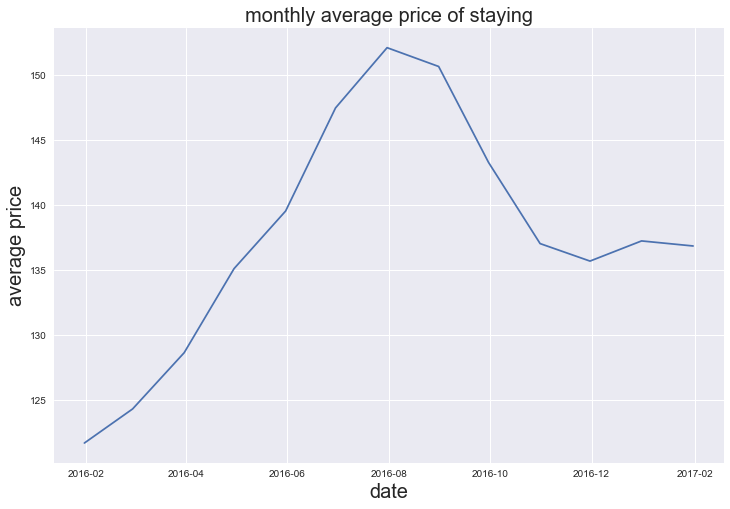

In [149]:


plt.figure(figsize=(12,8))

plt.plot(df2.index,df2["average"])
plt.title('monthly average price of staying',fontsize=20)
plt.xlabel('date', fontsize=20)
plt.ylabel('average price', fontsize=20)

# as we can see the peak is at the middle-end of sommer(vacations) and at Winter holidays

Now let's try to answer the second question: monthly availability of the place to stay. First of all it was decided to change the column "availabile" and map t(true) to 1 and f(false) to 0.

In [150]:
calendar_data_mapped = calendar_data

In [151]:
calendar_data_mapped["available"] = pd.DataFrame(calendar_data_mapped["available"].map({"t":1,"f":0}))
calendar_data_mapped["available"].head()

0     1
1     1
9     1
10    1
14    1
Name: available, dtype: int64

In [152]:
calendar_grouped_av  = calendar_data_mapped.groupby("date")[["available"]].sum()
calendar_grouped_av.index = pd.to_datetime(calendar_grouped_av.index)
calendar_grouped_av =  calendar_grouped_av[["available"]].resample("M").mean()
calendar_grouped_av.head()

,available
date,
2016-01-31,2115.678571
2016-02-29,2528.310345
2016-03-31,2707.677419
2016-04-30,2534.566667
2016-05-31,2579.709677


#### Now let's make visualisation, that will help us to answer the second question: monthly availability of the place to stay? 

Text(0,0.5,'availability')

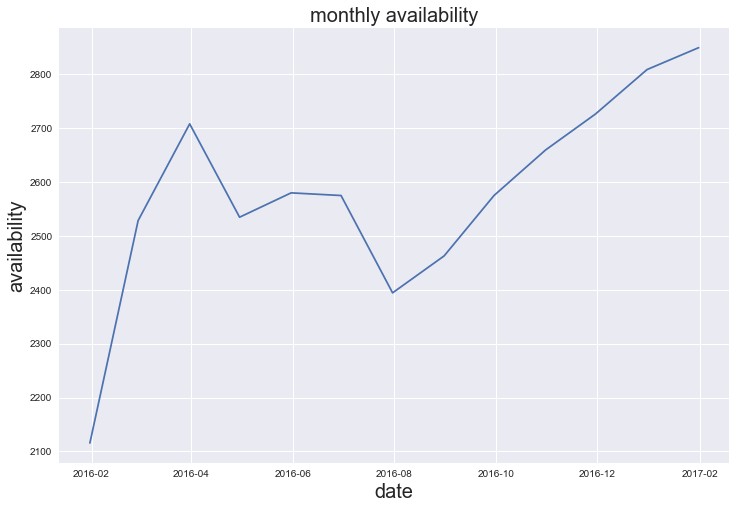

In [153]:
plt.figure(figsize=(12,8))


plt.plot(calendar_grouped_av.index, calendar_grouped_av["available"])
plt.title('monthly availability',fontsize=20)
plt.xlabel('date', fontsize=20)
plt.ylabel('availability', fontsize=20)



the lowest availability is in summer, with the lowest point in August. Due to the high number of missing values te period from 2016-02 to 2016-03 is considered misleading.

now let's find the correlation between monthly average price and availability.

In [154]:
comparison = pd.concat([calendar_grouped_av, df2["average"]], axis = 1)
comparison

,available,average
date,,
2016-01-31,2115.678571,121.692505
2016-02-29,2528.310345,124.315614
2016-03-31,2707.677419,128.640797
2016-04-30,2534.566667,135.109460
2016-05-31,2579.709677,139.539566
2016-06-30,2574.800000,147.469191
2016-07-31,2394.258065,152.102977
2016-08-31,2462.806452,150.657032
2016-09-30,2574.866667,143.277182


#### visualisation for the following question: Is there a correlation with prices?

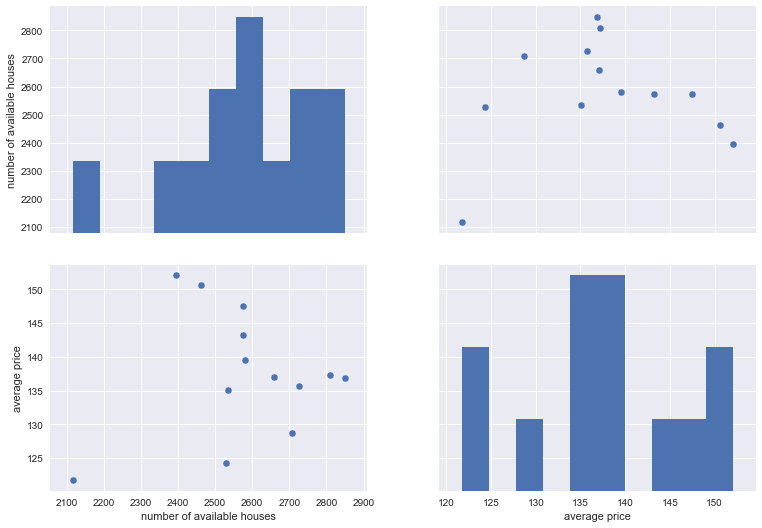

In [155]:
corr_df = comparison.copy()
corr_df.columns = ["number of available houses","average price"]
g = sns.pairplot(corr_df)
g.fig.set_size_inches(12,8)

### as we can see, the high prices do not imply the greater number of free rooms. 

## Data Modeling

The prediction model is going to be build in the following part of the code, but first of all it necessary to requiered prepare the data for modeling. 

In [156]:
# it was decided to take reviews as basis variables for prediction of a price
reviews = listings_data[["review_scores_rating","review_scores_accuracy","review_scores_cleanliness","review_scores_checkin","review_scores_communication","review_scores_location","review_scores_value"]]
reviews.head()

,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,95.0,10.0,10.0,10.0,10.0,9.0,10.0
1,96.0,10.0,10.0,10.0,10.0,10.0,10.0
2,97.0,10.0,10.0,10.0,10.0,10.0,10.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,92.0,9.0,9.0,10.0,10.0,9.0,9.0


In [157]:
listings_data["price"].isna().sum()

0

check for missing values

In [158]:
listings_data.select_dtypes(["int","float"]).isna().sum()

host_listings_count               2
host_total_listings_count         2
latitude                          0
longitude                         0
bathrooms                        16
bedrooms                          6
beds                              1
square_feet                    3721
review_scores_rating            647
review_scores_accuracy          658
review_scores_cleanliness       653
review_scores_checkin           658
review_scores_communication     651
review_scores_location          655
review_scores_value             656
license                        3818
reviews_per_month               627
dtype: int64

### we can drop columns "square_feet" and "license" due to a high number of missing values. We should also drop columns "latitude" and "longitude", because they do not carry much necessary information. 
### for other columns with missing values it was decided to fill them with averages 

In [159]:
X = listings_data.select_dtypes(["int","float"])
X = X.drop(["square_feet","license","latitude","longitude"], axis = 1)

In [160]:
fill_mean = lambda col: col.fillna(col.mean())

X = X.apply(fill_mean, axis = 0)
X.isna().sum()

host_listings_count            0
host_total_listings_count      0
bathrooms                      0
bedrooms                       0
beds                           0
review_scores_rating           0
review_scores_accuracy         0
review_scores_cleanliness      0
review_scores_checkin          0
review_scores_communication    0
review_scores_location         0
review_scores_value            0
reviews_per_month              0
dtype: int64

the same procedure of changing the type of "price" column as before

In [162]:
y = listings_data["price"]
prepare = lambda row: row.replace("$","").replace(",","")

y = y.apply(prepare)

### based on manual analysis of other columns in "listing" data set it was decided to add additional features.

The following columns represet binary variables with values "t"(true) or "f"(false), so it was decided to map them as it was done before with "availability" column ( {"t":1,"f":0} ).

In [163]:
add_cols = listings_data[["host_is_superhost","host_has_profile_pic","host_identity_verified","is_location_exact",
                          "require_guest_profile_picture","require_guest_phone_verification"]]

mapping = lambda col: col.map({"t":1,"f":0})
filling = lambda col: col.fillna(0)

add_cols = add_cols.apply(mapping)
add_cols = add_cols.apply(filling, axis = 0)



In [164]:
add_cols.isna().sum()

host_is_superhost                   0
host_has_profile_pic                0
host_identity_verified              0
is_location_exact                   0
require_guest_profile_picture       0
require_guest_phone_verification    0
dtype: int64

##### combining features

In [165]:
X = pd.concat([X,add_cols], axis = 1)
X.head()

,host_listings_count,host_total_listings_count,bathrooms,bedrooms,beds,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,host_is_superhost,host_has_profile_pic,host_identity_verified,is_location_exact,require_guest_profile_picture,require_guest_phone_verification
0,3.0,3.0,1.0,1.0,1.0,95.000000,10.000000,10.000000,10.000000,10.000000,9.000000,10.000000,4.070000,0.0,1.0,1.0,1,0,0
1,6.0,6.0,1.0,1.0,1.0,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.480000,1.0,1.0,1.0,1,1,1
2,2.0,2.0,4.5,5.0,7.0,97.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.150000,0.0,1.0,1.0,1,0,0
3,1.0,1.0,1.0,0.0,2.0,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,2.078919,0.0,1.0,1.0,1,0,0
4,2.0,2.0,2.0,3.0,3.0,92.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,0.890000,0.0,1.0,1.0,1,0,0


In [166]:
X.shape

(3818, 19)

In [167]:
X.isna().sum()

host_listings_count                 0
host_total_listings_count           0
bathrooms                           0
bedrooms                            0
beds                                0
review_scores_rating                0
review_scores_accuracy              0
review_scores_cleanliness           0
review_scores_checkin               0
review_scores_communication         0
review_scores_location              0
review_scores_value                 0
reviews_per_month                   0
host_is_superhost                   0
host_has_profile_pic                0
host_identity_verified              0
is_location_exact                   0
require_guest_profile_picture       0
require_guest_phone_verification    0
dtype: int64

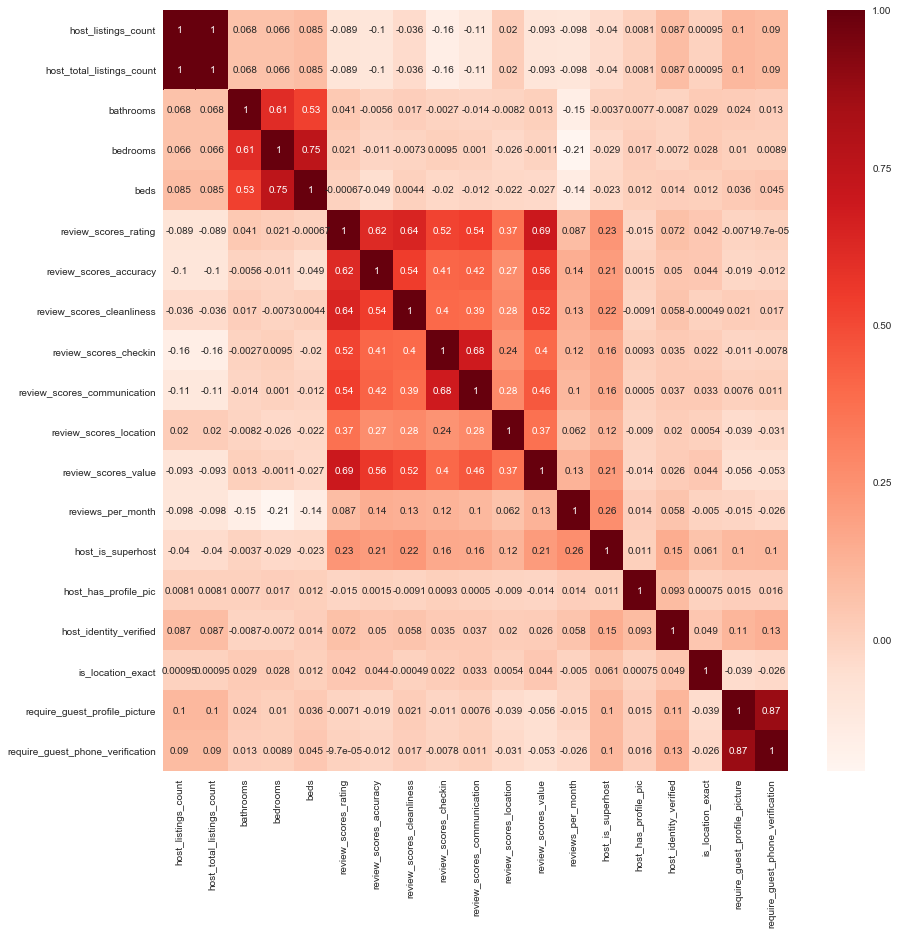

In [168]:
# let's check the correlation of this variables with each-other using heatmap
check_df = pd.concat([X,y], axis = 1)
cor = check_df.corr()
plt.figure(figsize = (14,14))
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

it is not a surprise, that the values of reviews are correlated with each-other. Other variables show low correlation.

In [176]:
print(y.shape)
print(X.shape)

(3818,)
(3818, 19)


In [177]:
y = pd.DataFrame(y)

### Creating a model


in order to check our modet, it was decided to use "train_test_split" with a test_size of 30% from a whole data

In [178]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 33)

model = linear_model.Lasso(alpha=0.1)
model.fit(X_train, y_train)

y_test_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

test_score = r2_score(y_test, y_test_pred)
train_score = r2_score(y_train, y_train_pred)

## Evaluating the Results

In [179]:
test_score

0.48731330055477107

In [180]:
coef = pd.Series(model.coef_, index = X.columns)

print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 17 variables and eliminated the other 2 variables


Text(0.5,1,'Feature importance using Lasso Model')

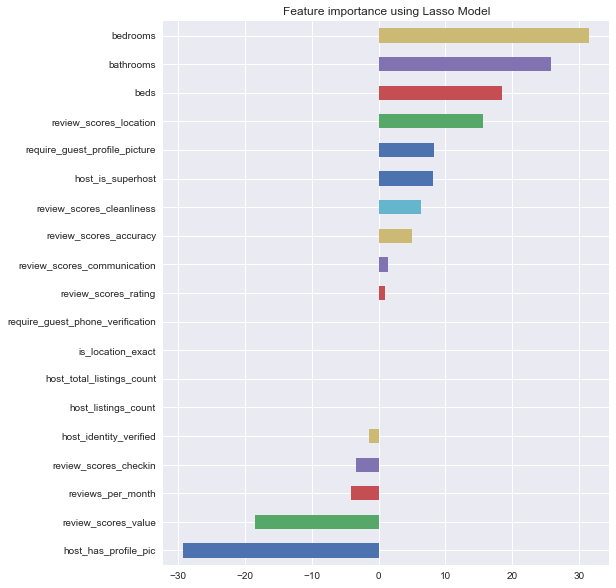

In [183]:
# let's check how our model organized the feature importance
imp_coef = coef.sort_values()
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")